### BlackjackAI using Monte Carlo Reinforcement Learning approach

#### Importing  Necessary libraries

In [48]:
import gym
import numpy as np 
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import collections 

#### Establishing the policy architecture

In [52]:
env_n = "BlackjackMax-v0"
epsilon = 0.1
epsilon_min = 0.05
gamma = 1 
alpha = 0.03
double = 2
hit = 1
stick = 0

#### Defining player class and functions

In [53]:
class Player:
    def __init__(self):
        self.env = gym.make(env_n, natural=False, double_down = dd, dealer_expose = True)
        self.state = self.env.reset()
        self.policy = collections.defaultdict(self.default_policy)
        self.values = collections.defaultdict(float)

    def default_policy(self):
        return [1/len(bet)] * len(bet)

    def play_action(self, blackjack_state):
        player_sum, dealer_upcard, usable_ace = blackjack_state
        return self.policy[(blackjack_state)]

    def play_action_argmax(self, blackjack_state):
        return np.argmax(self.policy[(blackjack_state)])

(15, 12, False)
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
average_win 0.025382
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


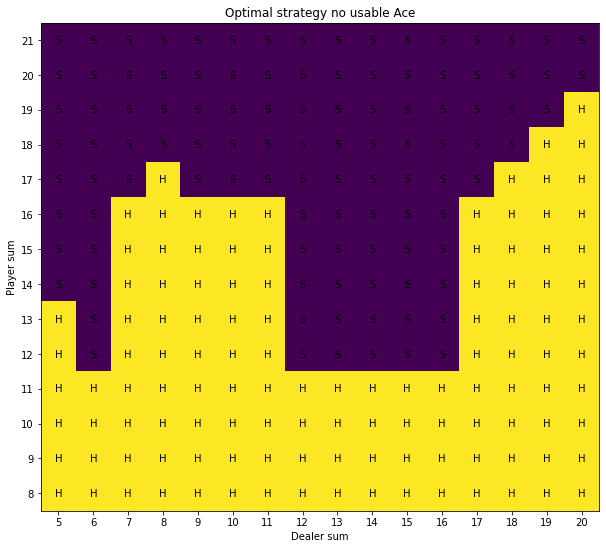

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


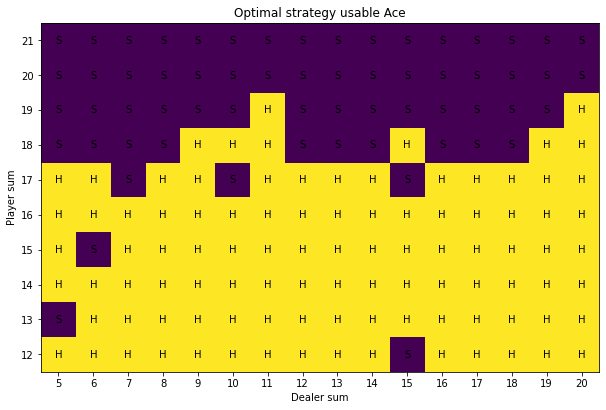

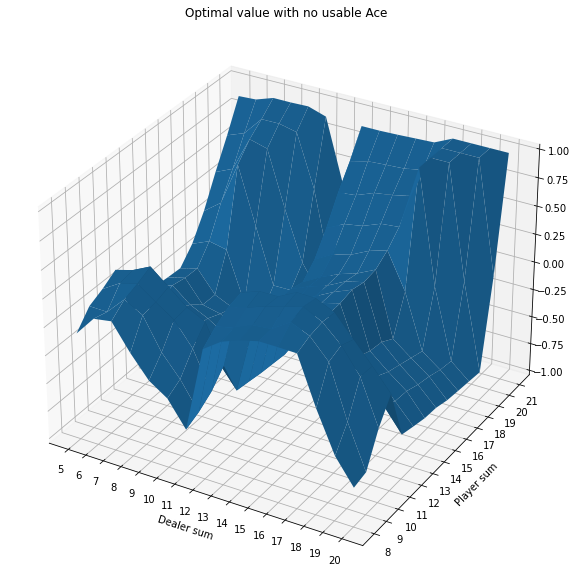

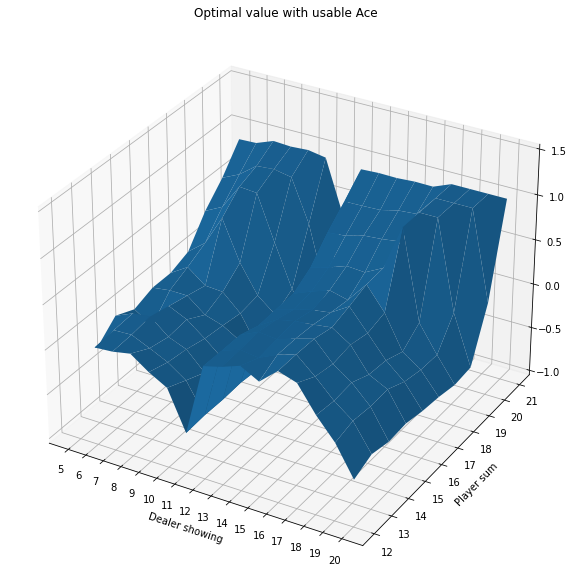

In [57]:
import warnings
warnings.filterwarnings("ignore")

if __name__ == "__main__":
    #defining an object of class Player as agent
    agent = Player()
    #
    next_state = agent.state
    print(next_state)

    returns_sum = collections.defaultdict(float)
    returns_count = collections.defaultdict(float)
    episode = []
    agent.env.reset()

## doing multiple iterations 
    for i in range(1000000):
        while True:
            action_probs = agent.play_action(next_state)
            action = np.random.choice(BETS, p=action_probs)
            episode.append((next_state, action))
            next_state, reward, done, _ = agent.env.step(action)

            if done:
                for (state, action) in episode:
                    returns_sum[(state,action)] += reward
                    returns_count[(state,action)] += 1
                    agent.values[(state, action)] = returns_sum[(state,action)] / returns_count[(state,action)]

                for (state, _) in episode:
                    vals = [agent.values[(state, a)] for a in bet]
                    best_action = np.argmax(vals)
                    for a in BETS:
                        if a == best_action:
                            agent.policy[state][a] = 1 - epsilon + epsilon/len(BETS)
                        else:
                            agent.policy[state][a] = epsilon/len(bet)

                episode = []
                next_state = agent.env.reset()
                
                if i % 100000 == 0:
                    print(i)
                break

    # Evaluating Policy  for our simulation
    pol_reward = 0
    iteration = 500000
    for i in range(iteration):
        next_state = agent.env.reset()
        while True:
            action = agent.play_action_argmax(next_state)
            next_state, reward, done, _ = agent.env.step(action)
            if done:
                pol_reward += reward
                next_state = agent.env.reset()
                break
    #checking the percentage of win
    average_win = pol_reward/iteration
    print('average_win', average_win)


    s = collections.defaultdict(str)
    pi = np.zeros((14, 16))
    for dealer in range(5,21):
        for player in range(8,22):
            best_action = np.argmax(agent.policy[(player,dealer,False)])
            pi[player-8, dealer-5] = best_action #our card, dealer card, valid Ace
            if best_action == 0:
                s[player-8, dealer-5] = 'S'
            elif best_action == 1:
                s[player-8, dealer-5] = 'H'
            else:
                s[player-8, dealer-5] = 'D'

    print(pi)
    pi = np.flipud(pi)
    fig, ax = plt.subplots(figsize=(10,12))
    im = ax.imshow(pi, extent=[4.5, 20.5, 7.5, 21.5])
    ax.set_xticks(np.arange(5,21))
    ax.set_yticks(np.arange(8,22))
    ax.set_title('Optimal strategy no usable Ace')
    ax.set_xlabel('Dealer sum')
    ax.set_ylabel('Player sum')
    for i in range(5,21):
        for j in range(8,22):
            text = ax.text(i, j, s[j-8, i-5], ha="center", va="center")
    ax.set_xticklabels(np.arange(5,21))
    ax.set_yticklabels(np.arange(8,22))
    plt.show()

    s = collections.defaultdict(str)
    pi = np.zeros((10, 16))
    for dealer in range(5,21):
        for player in range(12,22):
            best_action = np.argmax(agent.policy[(player,dealer,True)])
            pi[player-12, dealer-5] = best_action #our card, dealer card, valid Ace
            if best_action == 0:
                s[player-12, dealer-5] = 'S'
            elif best_action == 1:
                s[player-12, dealer-5] = 'H'
            else:
                s[player-12, dealer-5] = 'D'

    print(pi)
    pi = np.flipud(pi)
    fig, ax = plt.subplots(figsize=(10,12))
    im = ax.imshow(pi, extent=[4.5, 20.5, 11.5, 21.5])
    ax.set_xticks(np.arange(5,21))
    ax.set_yticks(np.arange(12,22))
    ax.set_title('Optimal strategy usable Ace')
    ax.set_xlabel('Dealer sum')
    ax.set_ylabel('Player sum')
    for i in range(5,21):
        for j in range(12,22):
            text = ax.text(i, j, s[j-12, i-5], ha="center", va="center")
    ax.set_xticklabels(np.arange(5,21))
    ax.set_yticklabels(np.arange(12,22))

    plt.show()


    figure = plt.figure(figsize=(10,12))
    ax = plt.axes(projection = '3d')
    x = np.arange(5,21)
    y = np.arange(8, 22)
    plt.xlabel('Dealer sum')
    plt.ylabel('Player sum')
    plt.title('Optimal value with no usable Ace')
    z = np.zeros((14, 16))
    for i in range(5,21):
        for j in range(8,22):
            z[j-8, i-5] = agent.values[(j, i, False), np.argmax(agent.policy[(j,i,False)])] #our card, dealer card, valid Ace
    x,y = np.meshgrid(x,y)
    ax.set_xticks(np.arange(5,21))
    ax.set_yticks(np.arange(8,22))
    ax.set_xticklabels(np.arange(5,21))
    ax.set_yticklabels(np.arange(8,22))
    ax.set_zlim(-1,1)
    ax.plot_surface(x,y,z)
    plt.show()


    figure = plt.figure(figsize=(10,12))
    ax = plt.axes(projection = '3d')
    x = np.arange(5,21)
    y = np.arange(12, 22)
    plt.xlabel('Dealer showing')
    plt.ylabel('Player sum')
    plt.title('Optimal value with usable Ace')
    z = np.zeros((10, 16))
    for i in range(5,21):
        for j in range(12,22):
            z[j-12, i-5] = agent.values[(j, i, True), np.argmax(agent.policy[(j,i,True)])] #our card, dealer card, valid Ace
    x,y = np.meshgrid(x,y)
    ax.set_xticks(np.arange(5,21))
    ax.set_yticks(np.arange(12,22))
    ax.set_xticklabels(np.arange(5,21))
    ax.set_yticklabels(np.arange(12,22))
    ax.set_zlim(-1,1.5)
    ax.plot_surface(x,y,z)
    plt.show()